In [6]:
# Example of interacting with plot using Button
# Import library
import plotly.graph_objects as pg
import plotly.express as px

In [7]:
# Dataset
df = px.data.gapminder().query("country=='India'")
df.head(3)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
696,India,Asia,1952,37.373,372000000,546.565749,IND,356
697,India,Asia,1957,40.249,409000000,590.061996,IND,356
698,India,Asia,1962,43.605,454000000,658.347151,IND,356


In [8]:
trace = pg.Scatter(x=df['year'],y=df['pop'],mode="lines")
layout = pg.Layout()
fig = pg.Figure(data=[trace])

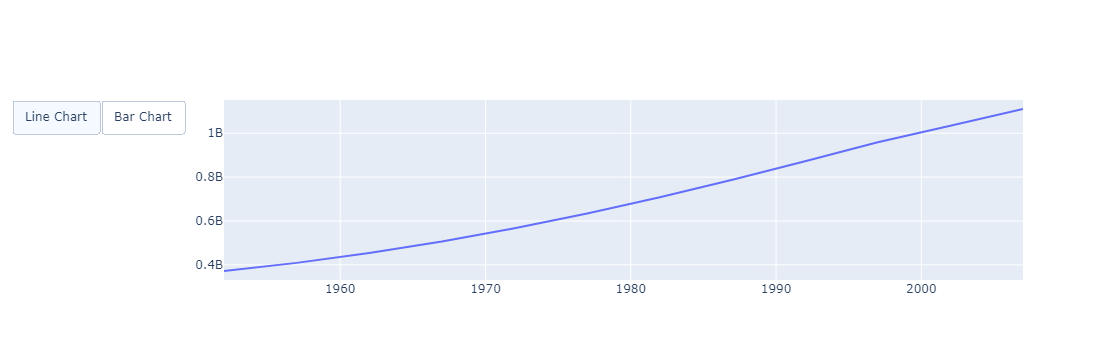

In [9]:
# Used restyle method
fig.update_layout(updatemenus=[dict(
    type="buttons",direction="right",buttons=list([
        dict(args=["type","scatter"],label='Line Chart',method="restyle"),
        dict(args=["type","bar"],label='Bar Chart',method="restyle"),
    ])
)])
fig.show()

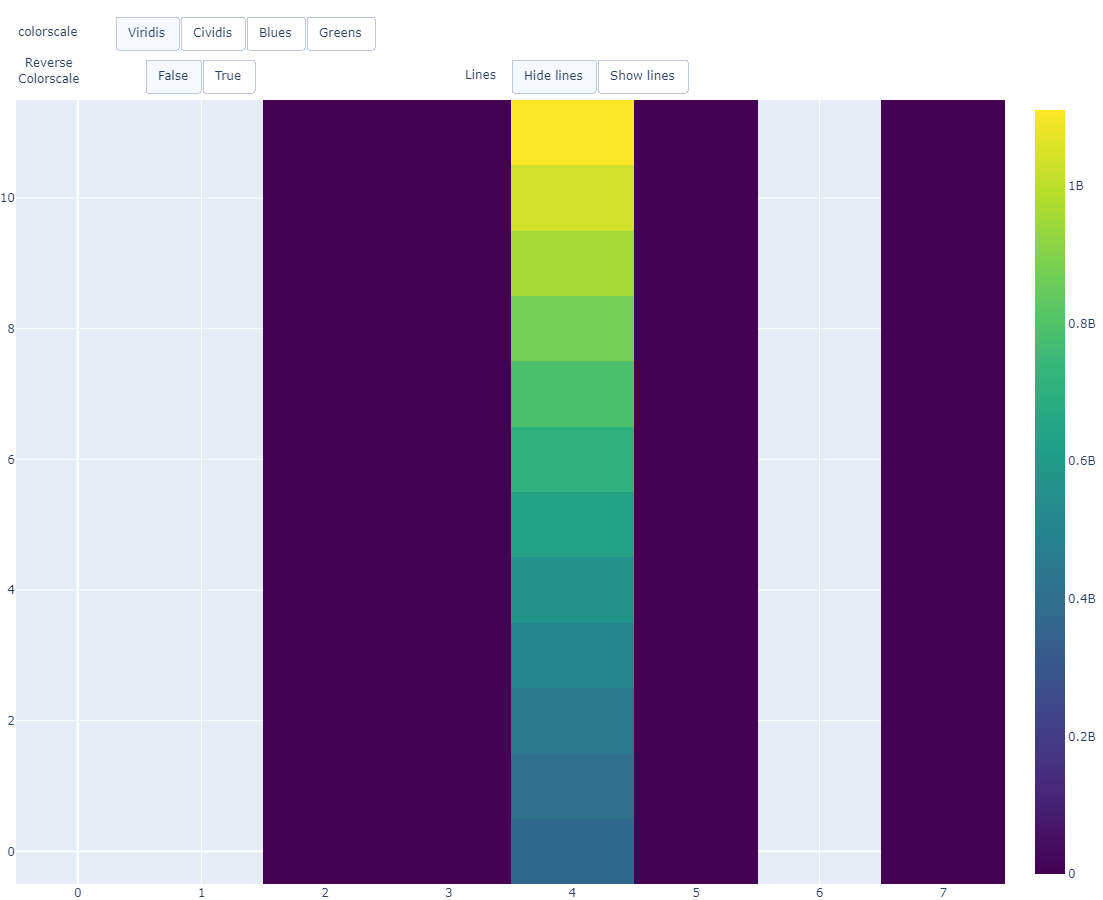

In [10]:
# Update Several Data Attributes
# Create figure
b_fig = pg.Figure()
# Add surface trace
b_fig.add_trace(pg.Heatmap(z=df.values.tolist(), colorscale="Viridis"))

# Update plot sizing
b_fig.update_layout(
    width=800,
    height=900,
    autosize=False,
    margin=dict(t=100, b=0, l=0, r=0),
)


# button_layer_1_height = 1.08
button_layer_1_height = 1.12
button_layer_2_height = 1.065

b_fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["colorscale", "Viridis"],
                    label="Viridis",
                    method="restyle"
                ),
                dict(
                    args=["colorscale", "Cividis"],
                    label="Cividis",
                    method="restyle"
                ),
                dict(
                    args=["colorscale", "Blues"],
                    label="Blues",
                    method="restyle"
                ),
                dict(
                    args=["colorscale", "Greens"],
                    label="Greens",
                    method="restyle"
                ),
            ]),
            type = "buttons",
            direction="right",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top"
        ),
        dict(
            buttons=list([
                dict(
                    args=["reversescale", False],
                    label="False",
                    method="restyle"
                ),
                dict(
                    args=["reversescale", True],
                    label="True",
                    method="restyle"
                )
            ]),
            type = "buttons",
            direction="right",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.13,
            xanchor="left",
            y=button_layer_2_height,
            yanchor="top"
        ),
        dict(
            buttons=list([
                dict(
                    args=[{"contours.showlines": False, "type": "contour"}],
                    label="Hide lines",
                    method="restyle"
                ),
                dict(
                    args=[{"contours.showlines": True, "type": "contour"}],
                    label="Show lines",
                    method="restyle"
                ),
            ]),
            type = "buttons",
            direction="right",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.5,
            xanchor="left",
            y=button_layer_2_height,
            yanchor="top"
        ),
    ]
)

b_fig.update_layout(
    annotations=[
        dict(text="colorscale", x=0, xref="paper", y=1.1, yref="paper",
                             align="left", showarrow=False),
        dict(text="Reverse<br>Colorscale", x=0, xref="paper", y=1.06,
                             yref="paper", showarrow=False),
        dict(text="Lines", x=0.47, xref="paper", y=1.045, yref="paper",
                             showarrow=False)
    ])

b_fig.show()

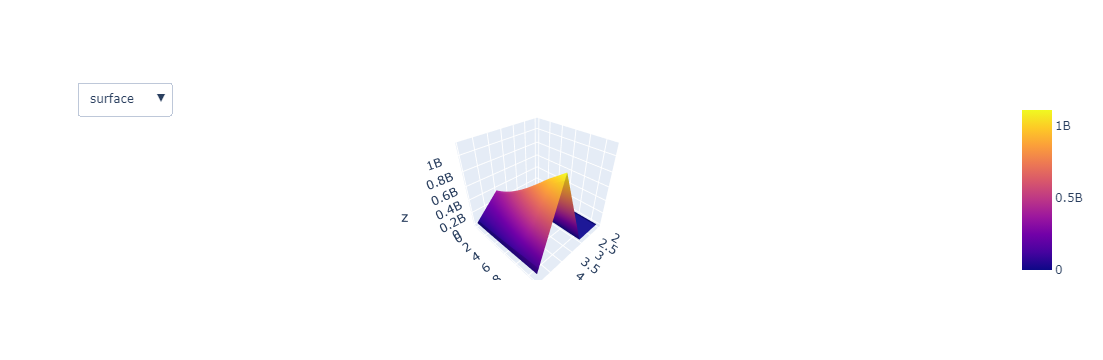

In [11]:
# Interact with plots uding drop-down menu
fig1 = pg.Figure()
fig1.add_trace(pg.Surface(z=df.values.tolist()))
fig1.update_layout(
    updatemenus=[dict(
    type="dropdown", direction="down",x=0.1,y=1.1,
    buttons=list([dict(
        args=['type','surface'],
        label="surface",method='restyle'),
                 dict(args=['type','heatmap'],label='heatmap',method='restyle')])
)])
fig1.show()

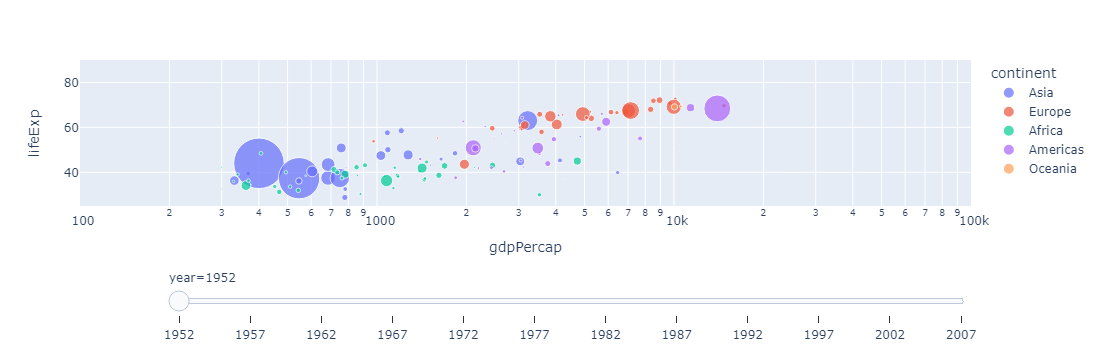

In [12]:
# Interact with plots using slider
# Importing Libraries
import plotly.express as px

# Loading data
df = px.data.gapminder()

# Creating animated scatter plot
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
# Remove animation button. (Comment this line and see what happens.)
fig["layout"].pop("updatemenus")
fig.show()

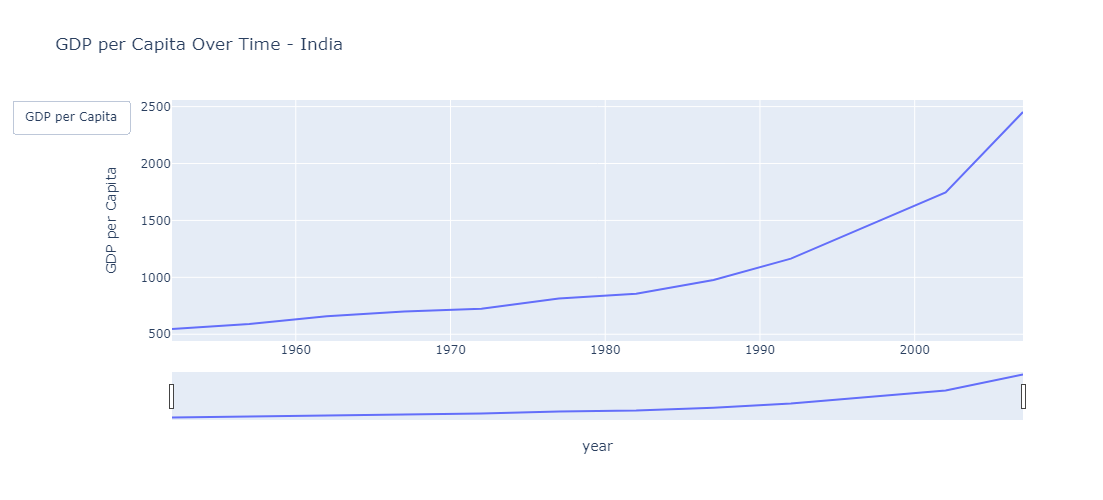

In [14]:
# Interact with plots using slector
# Importing Libraries
import plotly.express as px

# Load data for India
df_india = px.data.gapminder().query("country=='India'")

# Create a line chart with range slider and selector
fig = px.line(df_india,
              x='year',
              y='gdpPercap',
              title='GDP per Capita Over Time - India',
              labels={'gdpPercap': 'GDP per Capita'},
              line_shape='linear',
              range_x=[1952, 2007],  # Set the initial range for the x-axis
              height=500)

# Add a range slider for the x-axis
fig.update_xaxes(rangeslider_visible=True)

# Add a dropdown selector for the y-axis
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[
                dict(label='GDP per Capita',
                     method='update',
                     args=[{'y': [df_india['gdpPercap']],
                            'labels': {'y': 'GDP per Capita'}}]),
                # You can add more buttons for other variables if needed
            ],
        ),
    ]
)

# Display the plot
fig.show()

